# Exmaple water wire analysis

In [1]:
from mdhbond import WireAnalysis
import SimX

## Initialization

In [2]:
wwa = WireAnalysis('protein', SimX.psf_file, SimX.dcd_files)

## Setting up the initial water wire network

In [6]:
wwa.set_water_wires_csr(max_water=5)

In [ ]:
wwa.set_water_wires(max_water=5)

## Filtering and visualizing the filtered graph

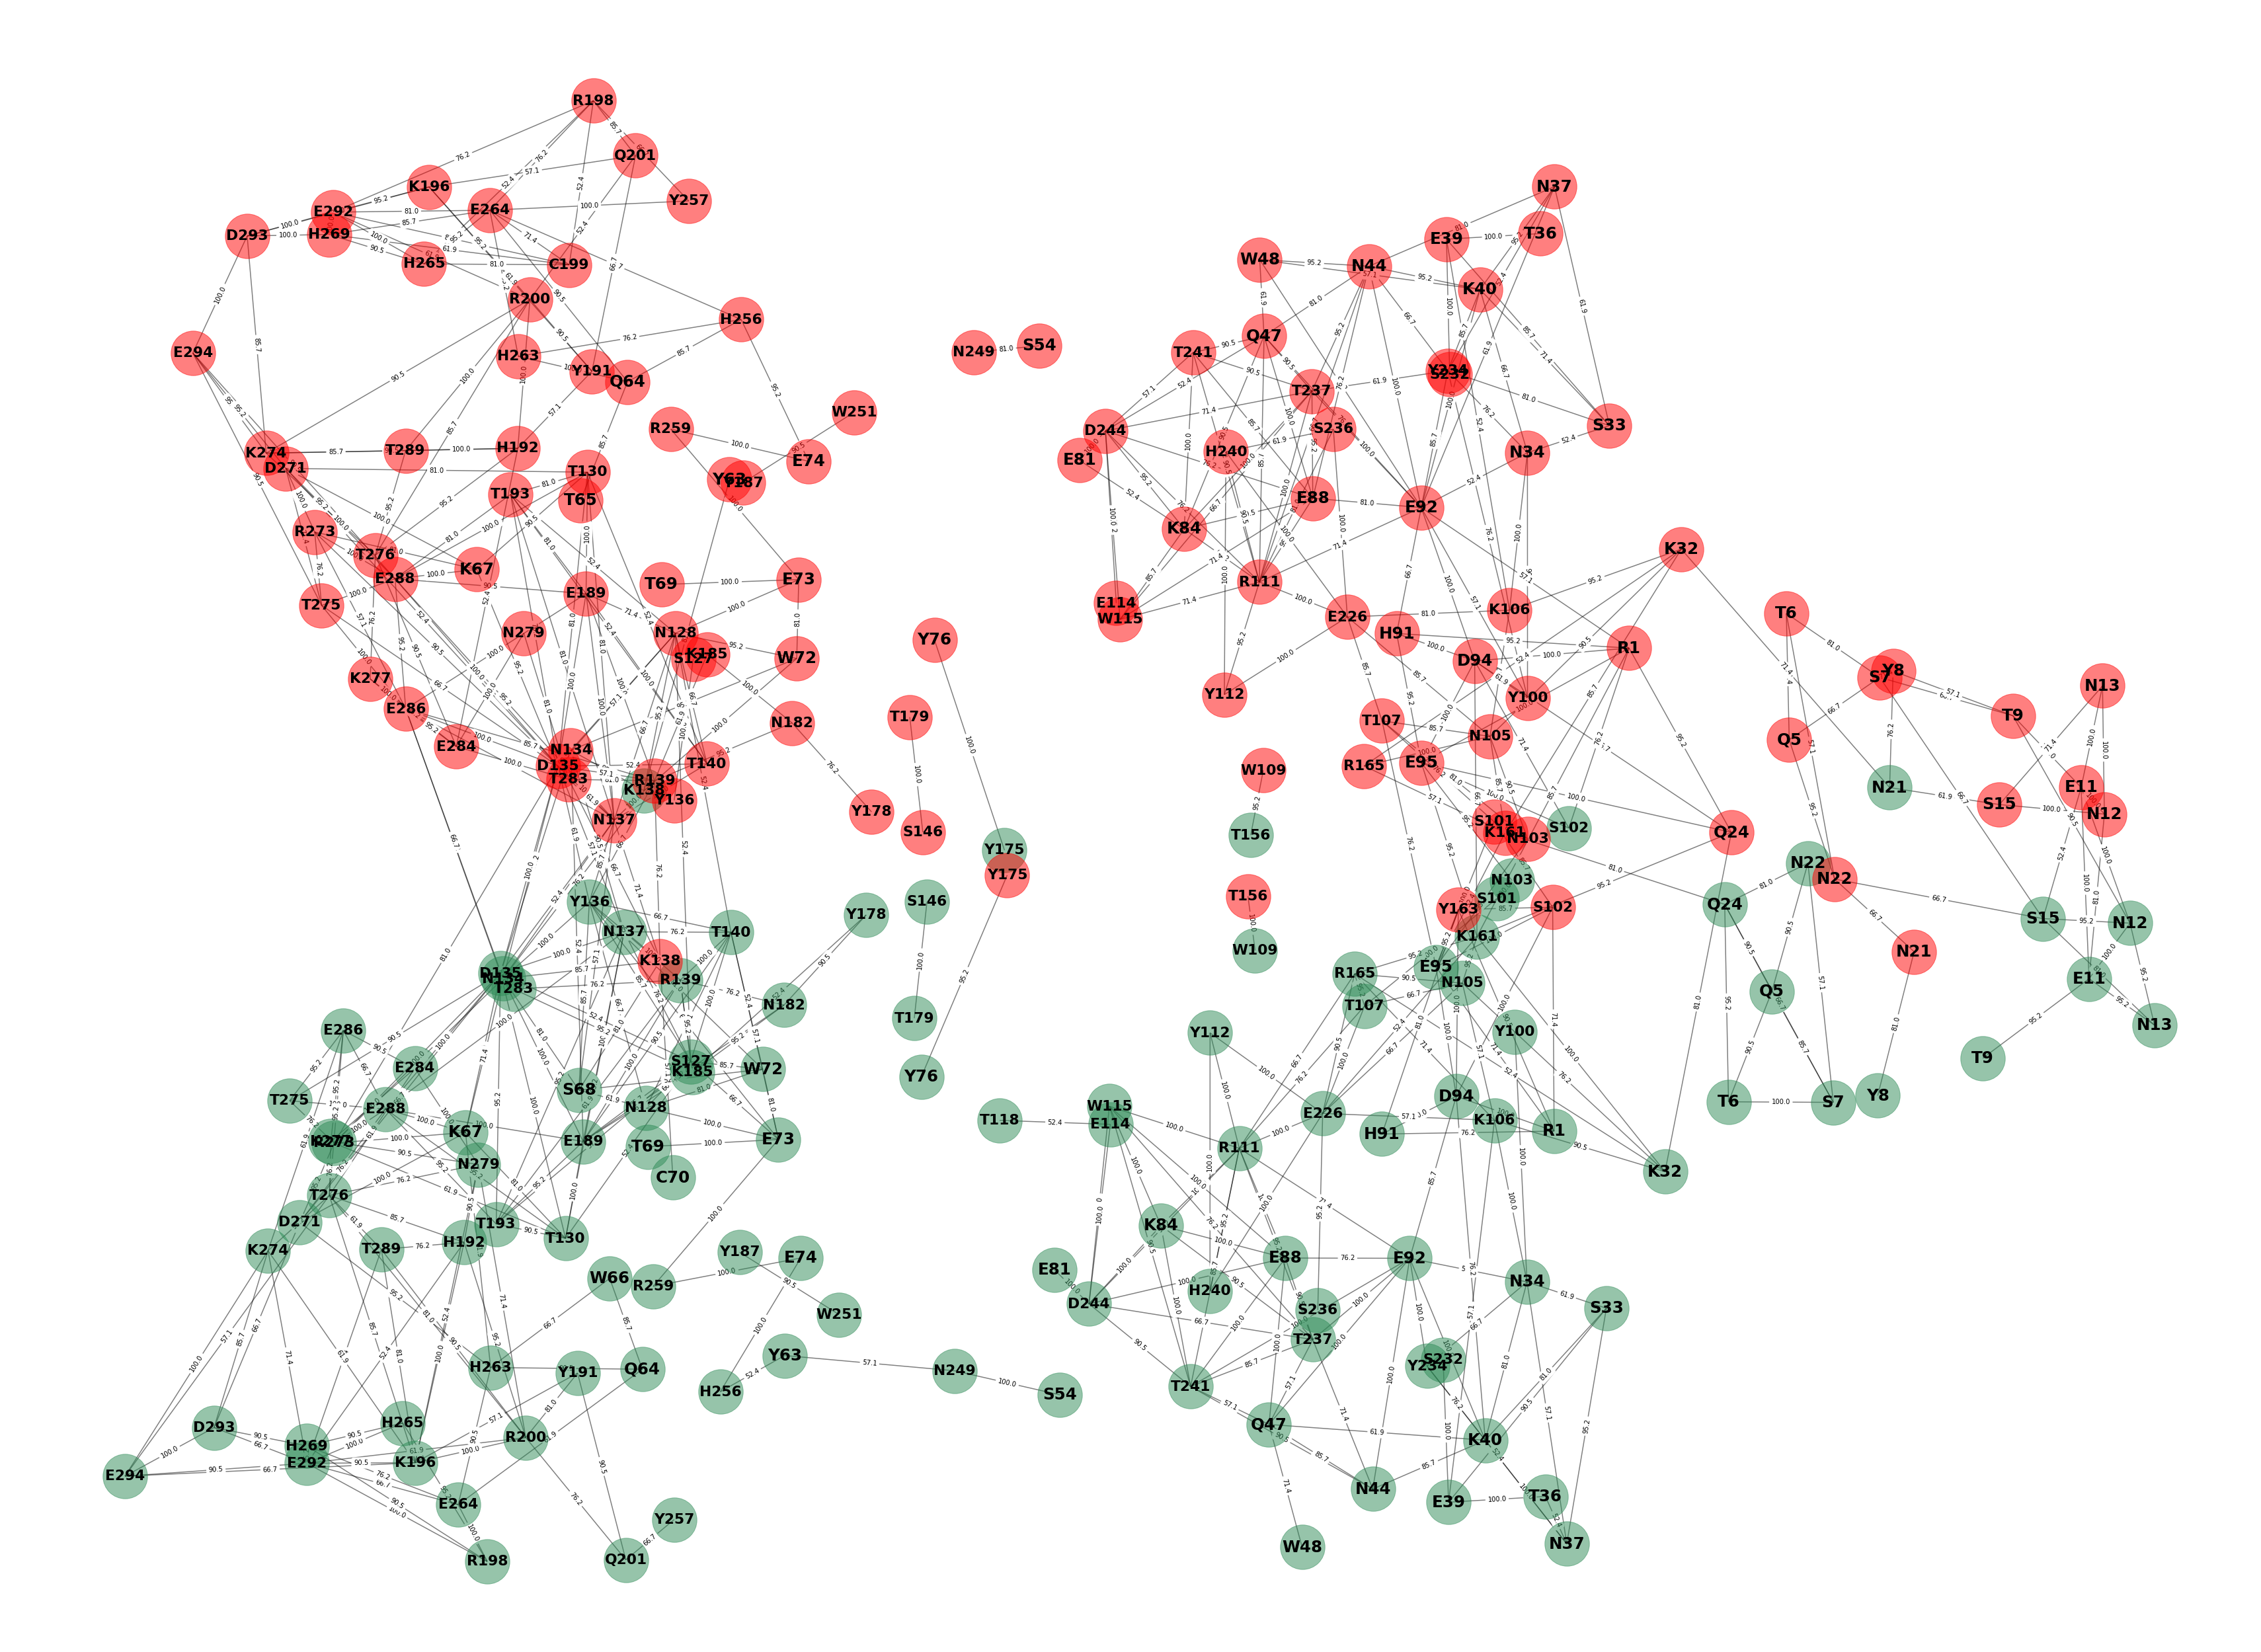

In [33]:
wwa.filter_occupancy(0.5, use_filtered=False)
wwa.draw_graph()

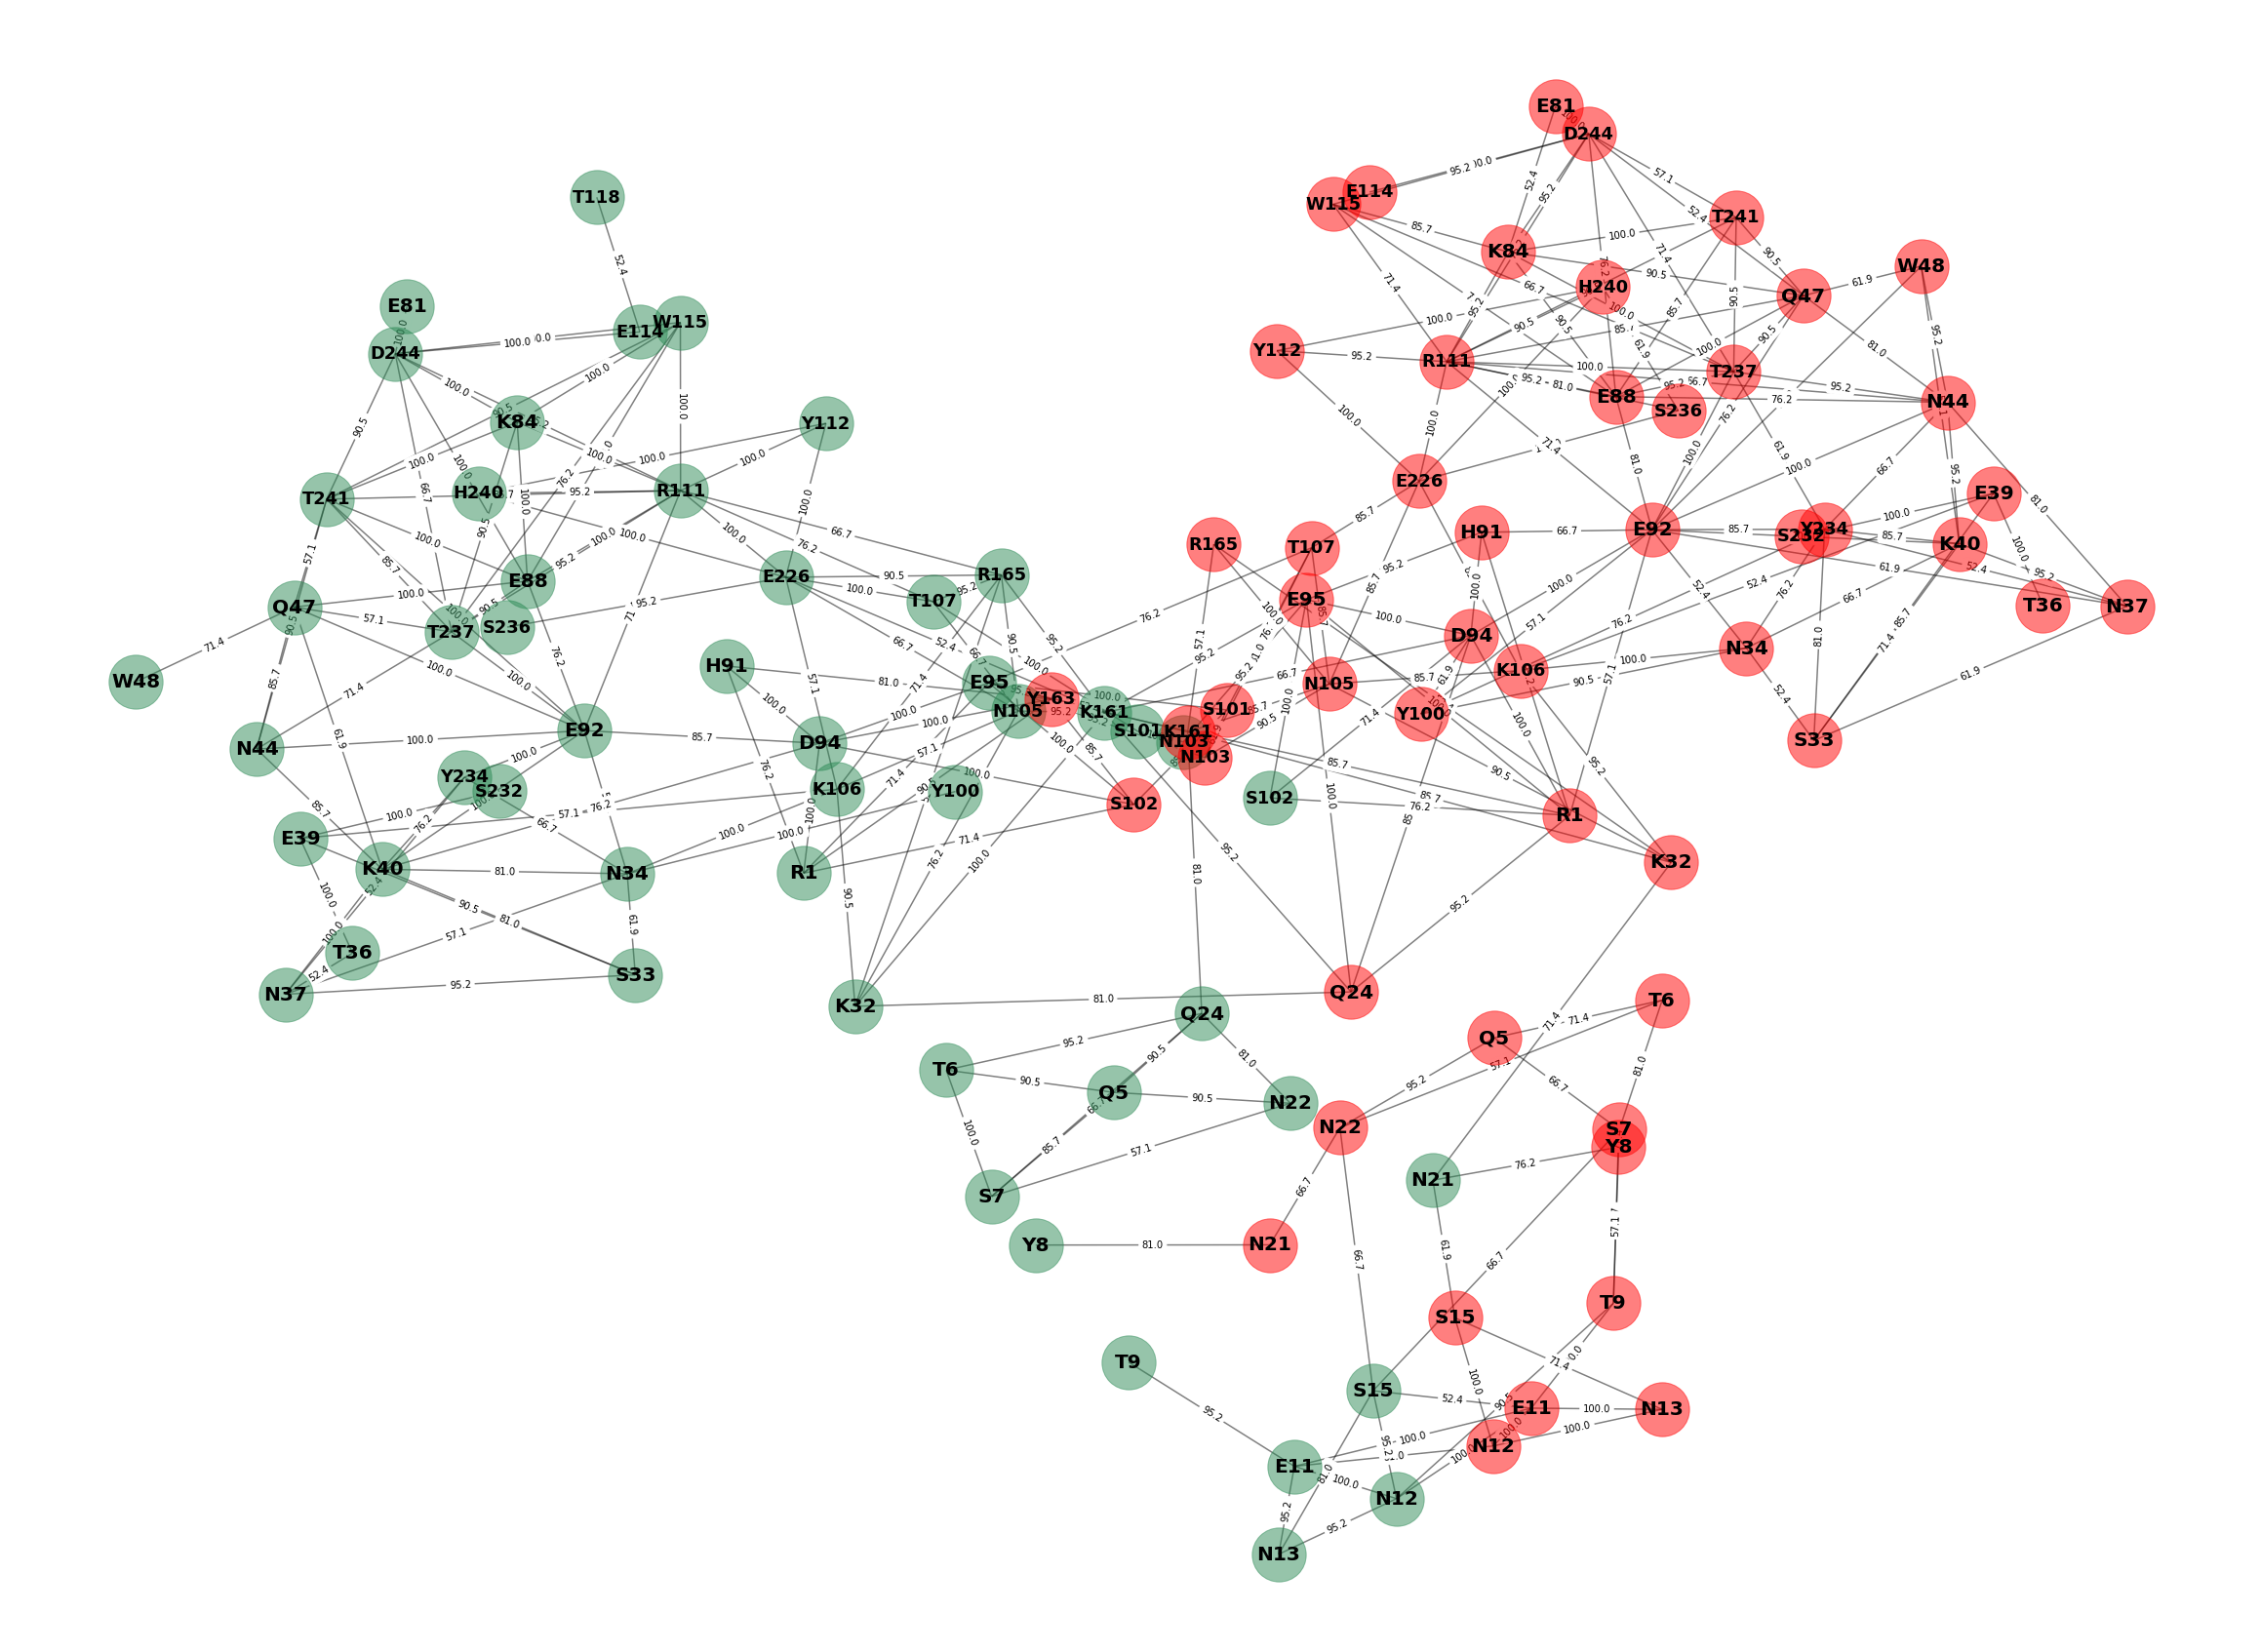

In [34]:
wwa.filter_connected_component('1CHR-GLU-88')
wwa.draw_graph()

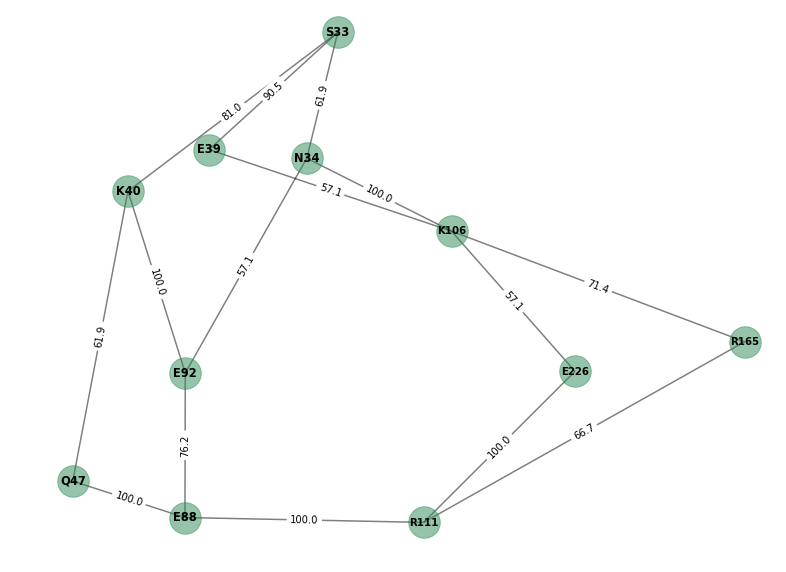

In [35]:
wwa.filter_all_paths('1CHR-GLU-88', '1CHR-GLU-39')
wwa.draw_graph()

## Computations on the filtered results

In [37]:
avg_water_dict = wwa.compute_average_water_per_wire()
for key in avg_water_dict:
    print(key, avg_water_dict[key])

1CHR-GLU-88:1CHR-ARG-111 2.4285714285714284
1CHR-GLU-88:1CHR-GLU-92 3.3125
1CHR-GLU-88:1CHR-GLN-47 0.6666666666666666
1CHR-ARG-111:1CHR-ARG-165 4.642857142857143
1CHR-ARG-111:1CHR-GLU-226 0.19047619047619047
1CHR-LYS-106:1CHR-ARG-165 4.866666666666666
1CHR-LYS-106:1CHR-GLU-39 4.583333333333333
1CHR-LYS-106:1CHR-GLU-226 4.583333333333333
1CHR-LYS-106:1CHR-ASN-34 0.0
1CHR-SER-33:1CHR-GLU-39 3.263157894736842
1CHR-ASN-34:1CHR-GLU-92 4.083333333333333
1CHR-LYS-40:1CHR-GLU-92 2.6666666666666665
1CHR-SER-33:1CHR-ASN-34 3.6923076923076925
1CHR-SER-33:1CHR-LYS-40 3.4705882352941178
1CHR-LYS-40:1CHR-GLN-47 4.6923076923076925


In [39]:
jo = wwa.compute_joint_occupancy()
print(jo)

0.09523809523809523


In [43]:
lengths_dict, jo_dict = wwa.compute_all_shortest_paths_info('1CHR-GLU-88', '1CHR-GLU-39')
for path in lengths_dict:
    print(path, lengths_dict[path], jo_dict[path])

1CHR-GLU-88-111-165-106-1CHR-GLU-39 16.52142857142857 0.3333333333333333
1CHR-GLU-88-111-226-106-1CHR-GLU-39 11.785714285714285 0.38095238095238093
1CHR-GLU-88-92-34-106-1CHR-GLU-39 11.979166666666666 0.23809523809523808
1CHR-GLU-88-92-34-33-1CHR-GLU-39 14.351298920377868 0.23809523809523808
1CHR-GLU-88-92-40-33-1CHR-GLU-39 12.712912796697626 0.5238095238095238
1CHR-GLU-88-47-40-33-1CHR-GLU-39 12.09272048900532 0.42857142857142855


## Plotting

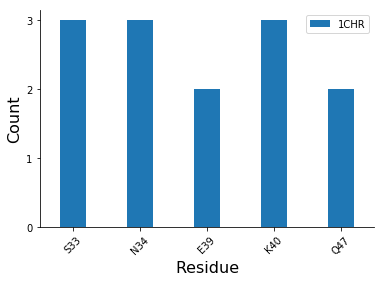

In [44]:
wwa.draw_connections_per_residue(residues_to_plot=range(50))

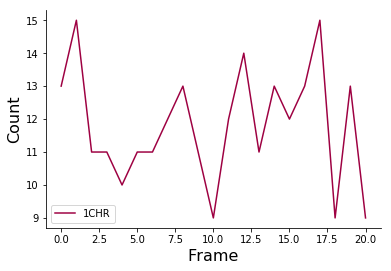

In [45]:
wwa.draw_multi_segment_connection_timeseries()

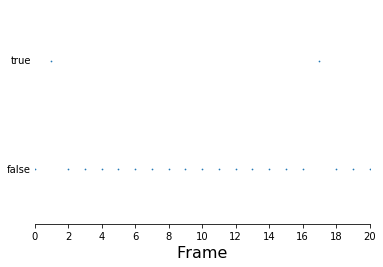

In [46]:
wwa.draw_joint_timeseries()

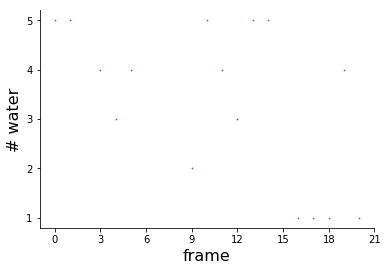

In [51]:
wwa.draw_water_timeseries(resa='1CHR-GLU-92', resb='1CHR-GLU-88')